In [65]:
# Initial Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [66]:
nba = pd.read_csv('Data/Clean_2017_NBA_Stats.csv', index_col=[0])
nba

,Player,Pos,Salary,Country,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Aaron Brooks,PG,2116955,USA,32,IND,65,0,894,9.5,...,0.800,18,51,69,125,25,9,66,93,322
2,Aaron Gordon,SF,5504420,USA,21,ORL,80,72,2298,14.4,...,0.719,116,289,405,150,64,40,89,172,1019
3,Aaron Harrison,SG,83129,USA,22,CHO,5,0,17,-2.2,...,0.500,0,3,3,3,0,0,0,2,1
4,Al Horford,C,27734405,Dominican Rep...,30,BOS,68,68,2193,17.7,...,0.800,95,369,464,337,52,87,116,138,952
5,Al Jefferson,C,9769821,USA,32,IND,66,1,931,18.9,...,0.765,75,203,278,57,19,16,33,125,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Wilson Chandler,SF,12016854,USA,29,DEN,71,33,2197,14.9,...,0.727,103,356,459,141,52,30,114,172,1117
378,Yogi Ferrell,PG,1312611,USA,23,TOT,46,29,1197,13.1,...,0.831,20,91,111,172,42,9,70,90,462
379,Zach LaVine,SG,3202217,USA,21,MIN,47,47,1749,14.6,...,0.836,18,141,159,139,41,10,85,104,889
380,Zach Randolph,PF,12307692,USA,35,MEM,73,5,1786,18.5,...,0.731,182,416,598,122,38,10,99,136,1028


In [75]:
nba['Salary_log'] = nba['Salary'].apply(lambda x: np.log(x))

In [85]:
nba.head()

,Player,Pos,Salary,Country,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary_log
1,Aaron Brooks,PG,2116955,USA,32,IND,65,0,894,9.5,...,18,51,69,125,25,9,66,93,322,14.565489
2,Aaron Gordon,SF,5504420,USA,21,ORL,80,72,2298,14.4,...,116,289,405,150,64,40,89,172,1019,15.521062
3,Aaron Harrison,SG,83129,USA,22,CHO,5,0,17,-2.2,...,0,3,3,3,0,0,0,2,1,11.328149
4,Al Horford,C,27734405,Dominican Rep...,30,BOS,68,68,2193,17.7,...,95,369,464,337,52,87,116,138,952,17.138184
5,Al Jefferson,C,9769821,USA,32,IND,66,1,931,18.9,...,75,203,278,57,19,16,33,125,535,16.094809


In [86]:
# Assign X (data) and y (target) 
# 'G','PTS', 'WS', 'PER', 'Age' R2: 0.5900334734920706
# 'G', 'PTS', 'WS', 'PER', 'Age', 'ORB%', 'DRB%', 'AST', 'TOV', 'FGA', 'FG', '3PA', '3P%' R2: 0.5972992598894363

X = nba[['G', 'PTS']]
y = nba["Salary"].values.reshape(-1, 1)
print(X.shape, y.shape)

(360, 2) (360, 1)


In [87]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [88]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [89]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [90]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train_scaled)

LinearRegression()

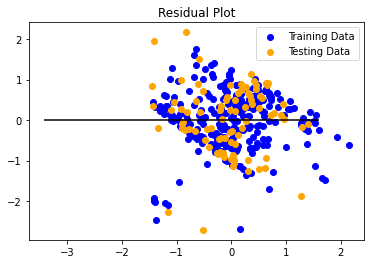

In [91]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = regressor.predict(X_test_scaled)
regressor.fit(X_train_scaled, y_train_scaled)
plt.scatter(regressor.predict(X_train_scaled), y_train_scaled - regressor.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test_scaled), y_test_scaled - regressor.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [92]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = regressor.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6895778341354307, R2: 0.31929353523254356


In [ ]:
# predictions = predictions.exp()

In [93]:
import pickle
pickle.dump(regressor, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [110]:
# x = nba.loc[2, ['G', 'PTS']].to_numpy()
# x = x.reshape(1, -1)
# z = nba.loc[2, 'Salary_log']
# regressor.predict(x)

array([[543.79944216]])

In [84]:
nba.dtypes

Player         object
Pos            object
Salary          int64
Country        object
Age             int64
Tm             object
G               int64
GS              int64
MP              int64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG              int64
FGA             int64
FG%           float64
3P              int64
3PA             int64
3P%           float64
2P              int64
2PA             int64
2P%           float64
eFG%          float64
FT              int64
FTA             int64
FT%           float64
ORB             int64
DRB             int64
TRB             int64
AST       

In [143]:
# Things to solve:
# Random Forest / Decision Tree
# What variables yield best accuracy?
## MSE: 0.4357035548929998, R2: 0.5972992598894363 highest 
## nba[['G', 'PTS', 'WS', 'PER', 'Age', 'ORB%', 'DRB%', 'AST', 'TOV', 'FGA', 'FG', '3PA', '3P%']]
### Main R2 factors: WS, PTS, FG, FGA